# Project of Performance and Experimentation Course

This is a practical project involving a procedure of measurement, analysis and experimentation of systems for the purpose to find possible ways to increase performance in time or space axis.

## Introduction and Topic of the project

The main idea for this project is to measure the performance between two different games: Factorio and Fallout: New Vegas on Windows. Factorio is an open world and survival game about automation and resource management that its goal is to fabricate a rocket that allows the player to deploy a satelite. While Fallout New Vegas is also an open world and exploration game about a post apocaliptic world with a western touch to it. Both games can be described as great games based on the reviews from Steam, the platform where these games were adquired.

The machine that's gonna be used for the experiment is a PC with the next hardware specifications:

- Processor: AMD Ryzen 7 5800x
- Memory: 32 GB DDR4
- Storage: SSD M.2 Adata Legend 800 2TB PCIe Gen4
- Graphics: Nvidia GeForce RTX 3070

As well, the software specifications comparing both operating systems are:

- Windows 11 (has a few tweaks for better perfomance and less bloat)

## Controllable factors

- Operating system version

- Desktop environment

- Active processes

- Game version

- Game resolution

- Game graphics quality

- Game texture size

- Game memory usage

- Max render threads

- Aspect Ratio

- Distance LOD

- Stage of the game: this factor means how advanced a player is in the game, for some games like Factorio, machines and processes inside the game start to stack together making the game take more resources and processing.

## Not controllable factors

- External temperature

- Scheduler algorithm

- Factory defects and general hardware damage

- Errors and crashes: for the "Fallout: New Vegas", the game publisher Bethesda (n.d.) recognizes that the game can be slightly unstable and might crash in some situations. This problems are not fault of the user, and there's nothing much to do about it that doesn't adds a modification of the game which affects it's performance in some degree.

- Resource assignment

## Studied factors

- Game resolution and aspect ratio

- Game graphics quality


## Response Variables

- Game frame rate

- Game CPU, GPU and memory usage


## Levels and Treatments

### Treatments for Fallout: New Vegas

For the aspect ratio, there are only 2 options which is the standard 4:3 or 5:4, and the widescreen that is 16:9. The resolution has many options, but because my monitor has its limit to 1920x1080, that will be the maximum resolution available, and the rest will be choosen based on how frequent it's to find someone with a monitor with that exact resolution: 1440x810 and 1680x945. Then the quality of the game graphics there's only 4: Low, medium, high and ultra, because this game is not that heavy in graphic processing, we can only use the high and ultra quality. In total, there will be 6 treatments with 2 levels each.

### Treatments for Factorio

The game doesn't gives a way to set up a resolution, that's because it takes the whole screen, which in my case is 1920x1080 resolution. However, it gives more options to the player for texture quality and graphic processing. These are the sprite resolution that can be set to high or normal, in this case it will not change and be static to high. The max number of threads that for now it uses as default 8 threads to render the game; this is the most important variable because as the game progresses it will require more processing, for the purpose of this experiment, the set of number of threads to use will be 4, 8 and 16. The video memory usage which can be set to all, high, medium and low; for the purpose of this investigation it will only be set to all and high. And Texture compression that can be set to high quality and low quality, as well this won't be changed and will remain in high quality compression. This gives a total of 6 treatments with 2 levels each.


## Tools for Monitoring

The only tool that will be used for Windows is MSI Afterburner due to its extensive amount of features for monitoring, logging and gathering of information about the system during the experiment.

## Method of capture of information about the response variables

For each treatment, the game will be runned for 3 minutes 5 times and recorded it's information on a log file for processing later.

## Parsing the MSI Afterburner log file

In [36]:
%pip install matplotlib
%pip install scipy
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.5 MB 7.7 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.5 MB 14.0 MB/s eta 0:00:01
   -------------------------- ------------- 7.6/11.5 MB 12.4 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 15.7 MB/s eta 0:00:00


In [43]:
from matplotlib.pylab import randn
import matplotlib.pyplot as plt
import statistics as stats
import numpy as np
import scipy.stats as st
import seaborn as sns

class PerformanceField:

    def __init__(self, name: str):
        self.name = name
        self.data = []
        self.max = 999999
        self.min = 0

    def insert(self, value):
        try:
            fl_value = float(value)
            if fl_value > self.min and fl_value < self.max:
                self.data.append(float(value))
                return True
            return False
        except:
            if (value != "N/A"):
                self.data.append(value)
                return True
            return False

    def remove(self, index):
        try:
            del self.data[index]
            return True
        except:
            return False
        
    def setLimits(self, max: float, min: float):
        self.min = min
        self.max = max
        
    def getValue(self, index):
        try:
            return self.data[index]
        except:
            return ""

    def getMeanAndStd(self):
        mean = stats.mean(self.data)
        std = stats.stdev(self.data)
        return mean, std
    
    def getNumberOfElements(self):
        return len(self.data)
    
    def getLimits(self):
        min = np.min(self.data)
        max = np.max(self.data)
        return min, max
    
    def getPValue(self):
        treatment = np.array(self.data)
        _, p_val_treatment = st.shapiro(treatment)
        return p_val_treatment

    def createHistogram(self):
        plt.title(self.name)
        plt.hist(self.data)
        plt.show()
        plt.subplot(1, 2, 2)
        st.probplot(self.data, dist="norm", plot=plt)
        plt.show()

    def createBoxPlot(self):
        sns.boxplot(self.data)
        plt.title(self.name)
        plt.show()

In [81]:
class MSILogFile:

    def __init__(self, treatment: int, limits: dict):
        self.treatment = treatment
        self.fields = dict()
        self.fieldsIndex = []
        try:
            self.limits = limits[str(treatment)]
        except:
            self.limits = {}

    def insertNewField(self, key: int, name: str):
        print(f'Inserted field {name} with the key {key}')
        self.fields[key] = PerformanceField(name)

        try:
            min = self.limits[name]['min']
            max = self.limits[name]['max']
        except:
            print(f'Not found limits for {name}')
            min = 0
            max = 999999
        self.fields[key].setLimits(max, min)
        self.fieldsIndex.append(key)

    def insertDataInField(self, fieldIndex: int, value):
        try:
            return self.fields[fieldIndex].insert(value)
        except Exception as e:
            print(f'Error at inserting {value} with key {fieldIndex}: ERROR {e}')
            return False

    def debug(self):
        print(f'self.fields length: {len(self.fields)}\nself.fieldsIndex length: {len(self.fieldsIndex)}')

    def analyze(self):
        # statsFactorioFile = open("./data/Factorio_Windows/statsFactorioFile.json", "w")

        for i in self.fieldsIndex:
            if (i > 1):
                mean, std = self.fields[i].getMeanAndStd()
                num = self.fields[i].getNumberOfElements()
                min, max = self.fields[i].getLimits()
                p_val = self.fields[i].getPValue()
                self.fields[i].createHistogram()
                self.fields[i].createBoxPlot()
                print(f"Values go from {min} to {max} of {num} elements, with mean {mean} and std {std}. With p-value for a normal distribution {p_val}")
        print()

In [89]:
import csv

class PerformanceProject:

    def __init__(self, treatment_num: int, test_num: int, path: str, limits: dict):
        self.treatment_num = treatment_num
        self.test_num = test_num
        self.path = path
        self.logs = []
        self.labelsIndex = []
        self.labels = {
            'GPU usage',
            'Memory usage',
            'CPU usage',
            'Framerate'
        }
        self.limits = limits

    def run(self):
        for i in range(1, self.treatment_num + 1):
            print(f"--------- RUNNING TREATMENT {i}")
            self.runTreatment(i)
            self.labelsIndex.clear()

    def runTreatment(self, treatment: int):
        self.logs.insert(treatment, MSILogFile(treatment, self.limits))

        for j in range(1, self.test_num):
            self.parseLogFile(self.path + f"Treatment_{treatment}/{j}.hml", treatment)

        self.analyzeTreatment(treatment)
            # self.logs[treatment - 1].debug()

    def parseLogFile(self, filepath: str, treatment: int):
        hasReadLabels = len(self.labelsIndex) > 0
        
        if not hasReadLabels:
            self.labelsIndex.append(1)
            self.logs[treatment - 1].insertNewField(1, 'Time')

        with open(filepath, "r", encoding= "ISO-8859-1") as csvdata:
            reader = csv.reader(csvdata)

            # Skip first 3 rows if labels were read before.
            if hasReadLabels:
                for i in range(0, 3):
                    reader.__next__()
            
            for row in reader:
                if len(row) >= 95 and row[90].strip() != "N/A":
                    if hasReadLabels:
                        for l in self.labelsIndex:
                            self.logs[treatment - 1].insertDataInField(l, row[l].strip())
                    else:
                        for l in range(1, len(row)):
                            if row[l].strip() in self.labels:
                                self.labelsIndex.append(l)
                                self.logs[treatment - 1].insertNewField(l, row[l].strip())
                        hasReadLabels = True
    
    def analyzeTreatment(self, treatment: int):
        self.logs[treatment - 1].analyze()

In [ ]:
import json

def run():
    treatmentsNum = 6
    testsNum = 5

    with open("./LimitsToRemoveOutliers.json", 'r') as file:
        limits = json.load(file)

    project = PerformanceProject(treatmentsNum, testsNum, "./data/Factorio_Windows/", limits)
    project.run()

if __name__ == '__main__':
    run()

--------- RUNNING TREATMENT 1
Inserted field Time with the key 1
Not found limits for Time
Inserted field GPU usage with the key 3
Inserted field Memory usage with the key 7
Inserted field CPU usage with the key 53
Inserted field Framerate with the key 90


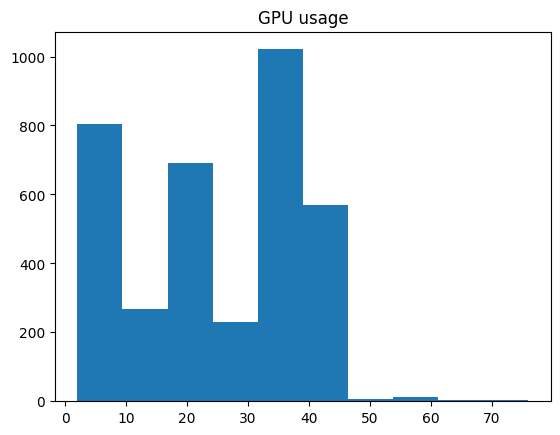

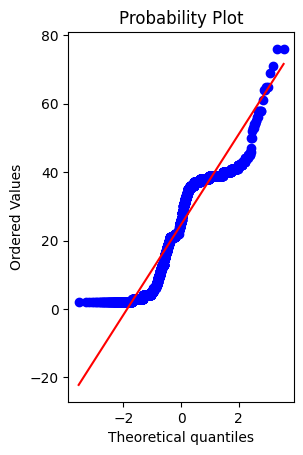

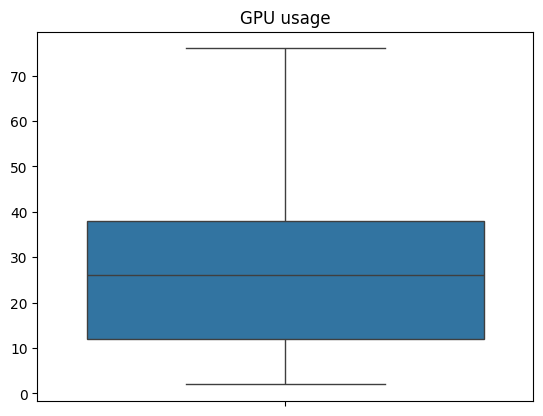

Values go from 2.0 to 76.0 of 3613 elements, with mean 24.7079988928868 and std 13.954967707151456. With p-value for a normal distribution 1.7449533441073565e-44


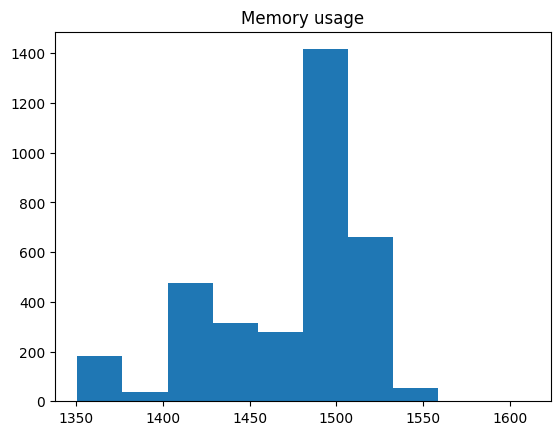

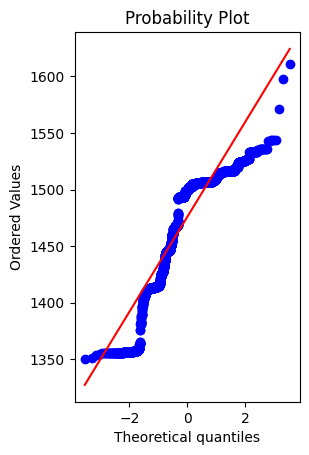

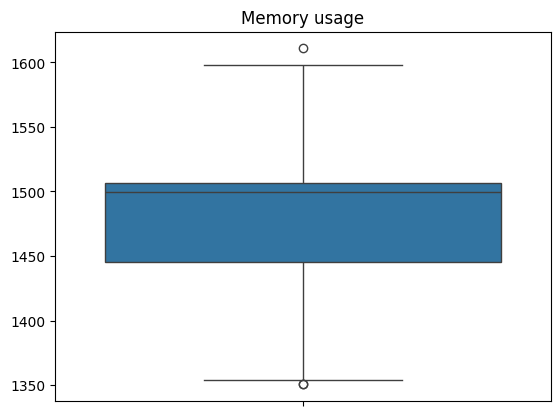

Values go from 1350.598 to 1610.809 of 3417 elements, with mean 1475.8281553994732 and std 45.87611103637878. With p-value for a normal distribution 1.1947104011491247e-50


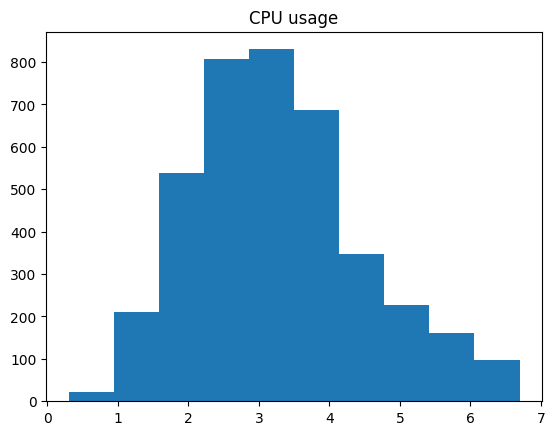

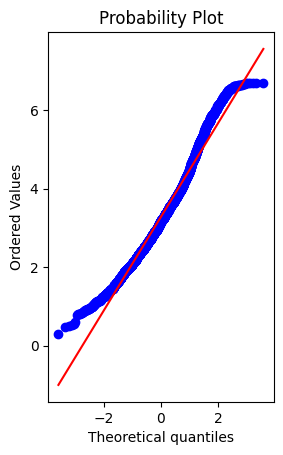

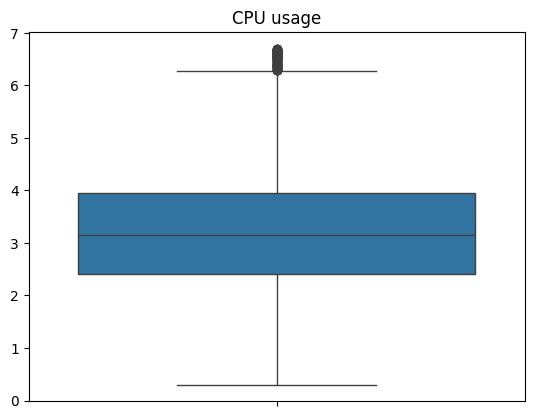

Values go from 0.302 to 6.698 of 3926 elements, with mean 3.2782060621497706 and std 1.2121200325560793. With p-value for a normal distribution 2.7426709920655246e-25


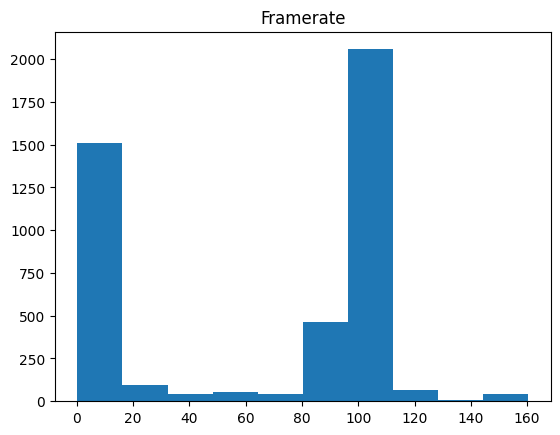

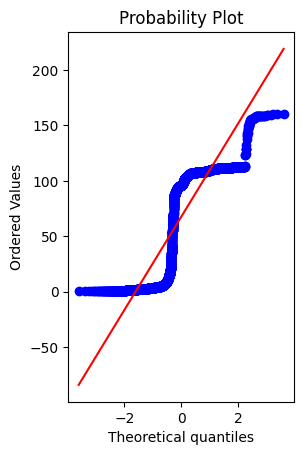

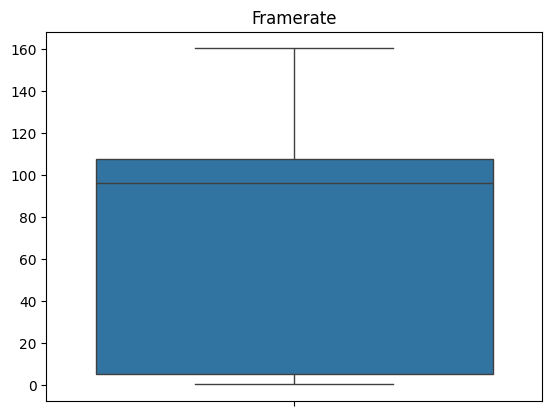

Values go from 0.3 to 160.4 of 4380 elements, with mean 67.40022831050229 and std 48.620955037213015. With p-value for a normal distribution 4.3020557909923027e-63

--------- RUNNING TREATMENT 2
Inserted field Time with the key 1
Not found limits for Time
Inserted field GPU usage with the key 3
Inserted field Memory usage with the key 7
Inserted field CPU usage with the key 53
Inserted field Framerate with the key 90


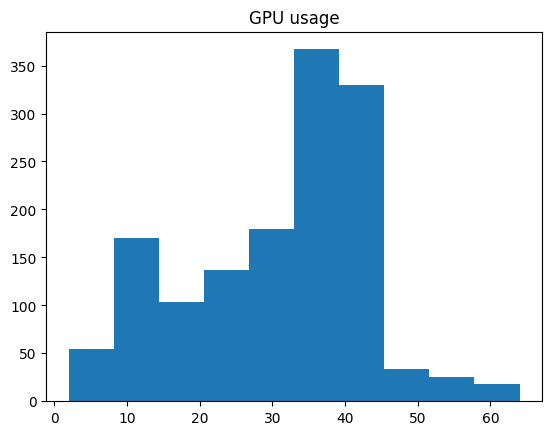

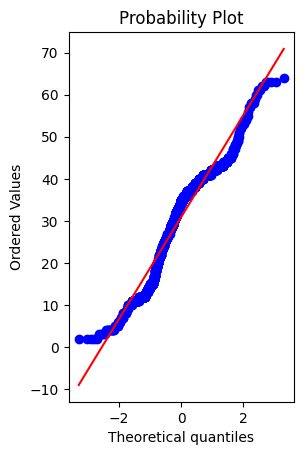

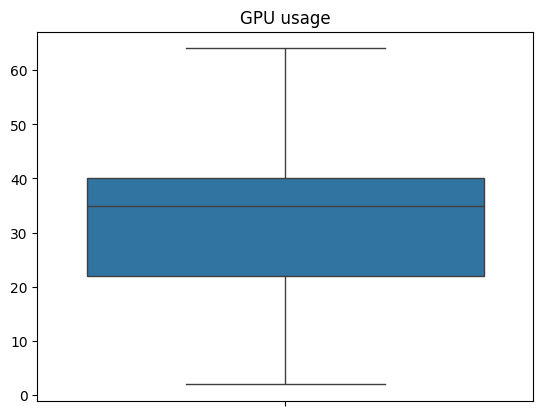

Values go from 2.0 to 64.0 of 1419 elements, with mean 30.9415081042988 and std 12.390341146166064. With p-value for a normal distribution 3.407944692894346e-21


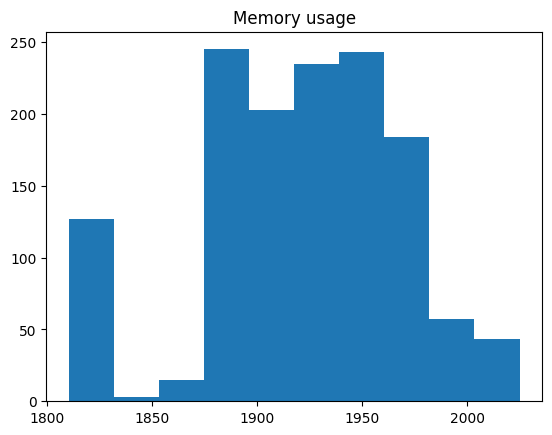

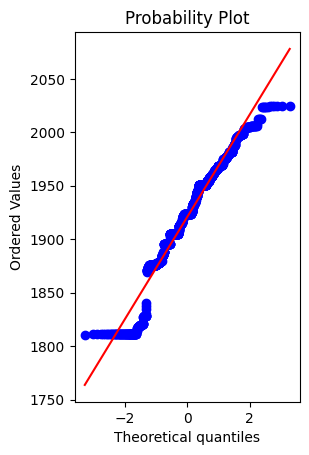

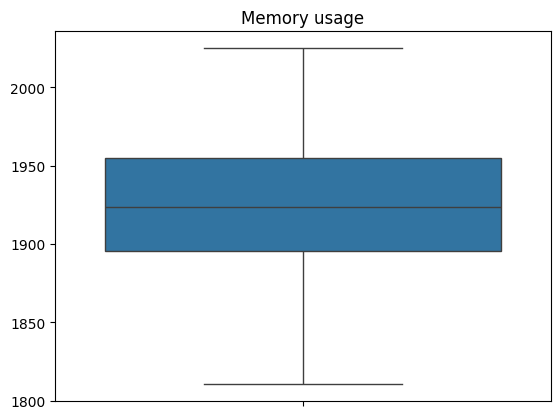

Values go from 1810.348 to 2024.945 of 1355 elements, with mean 1920.8468199261993 and std 48.73487128331747. With p-value for a normal distribution 9.181799453856583e-19


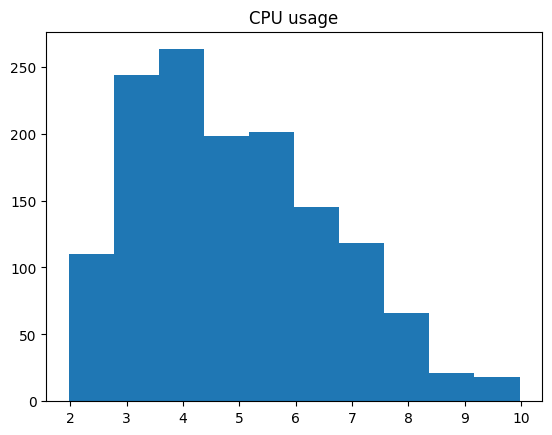

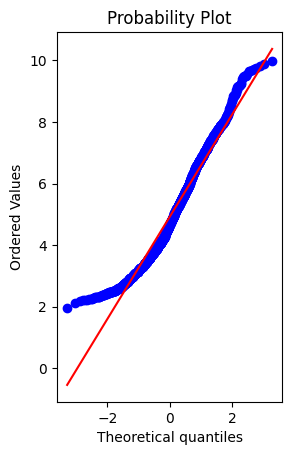

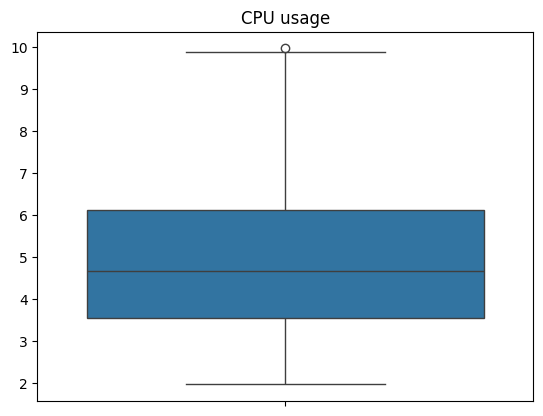

Values go from 1.971 to 9.973 of 1384 elements, with mean 4.916810693641619 and std 1.686409615135939. With p-value for a normal distribution 1.3976326526137717e-18


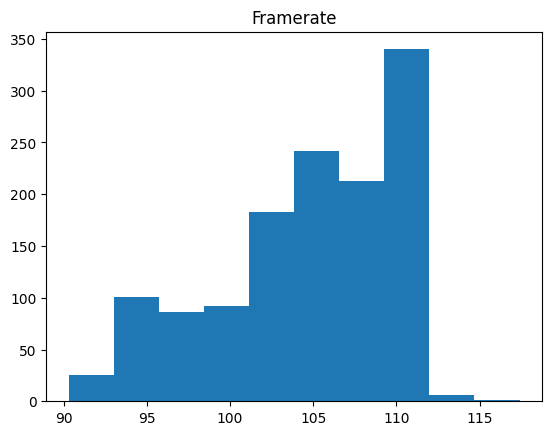

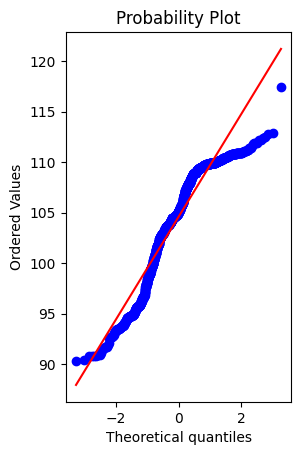

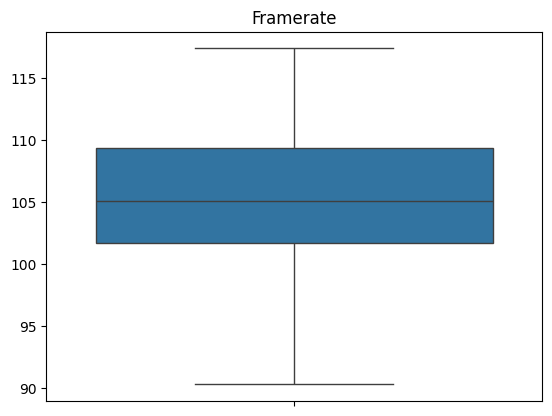

Values go from 90.3 to 117.4 of 1289 elements, with mean 104.5821567106284 and std 5.2930055807553416. With p-value for a normal distribution 7.566384011905728e-26

--------- RUNNING TREATMENT 3
Inserted field Time with the key 1
Not found limits for Time
Inserted field GPU usage with the key 3
Inserted field Memory usage with the key 7
Inserted field CPU usage with the key 53
Inserted field Framerate with the key 90


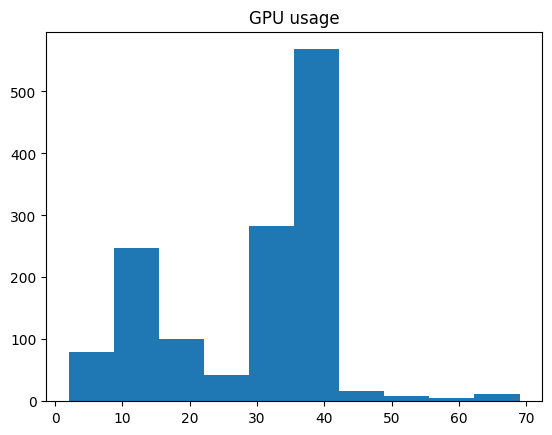

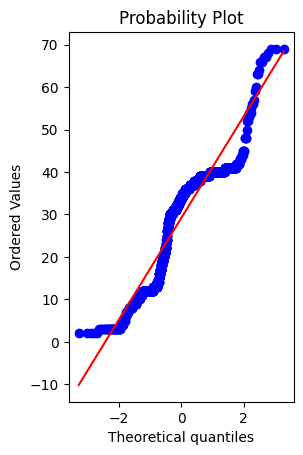

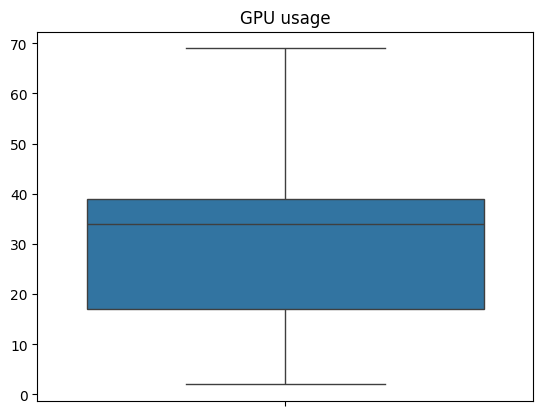

Values go from 2.0 to 69.0 of 1363 elements, with mean 29.162142333088774 and std 12.647170826517508. With p-value for a normal distribution 5.868707159661082e-30


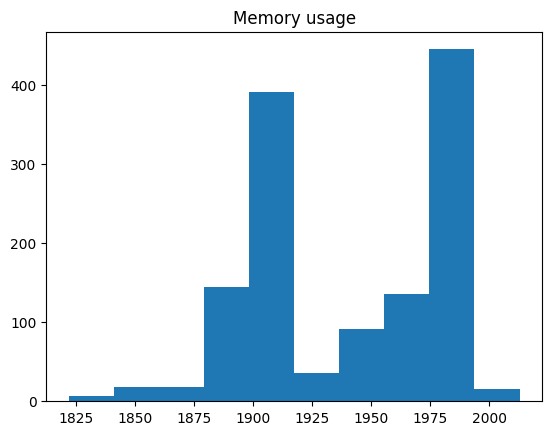

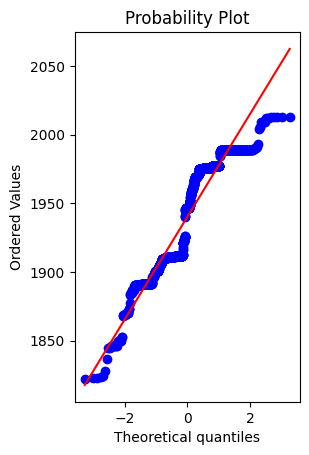

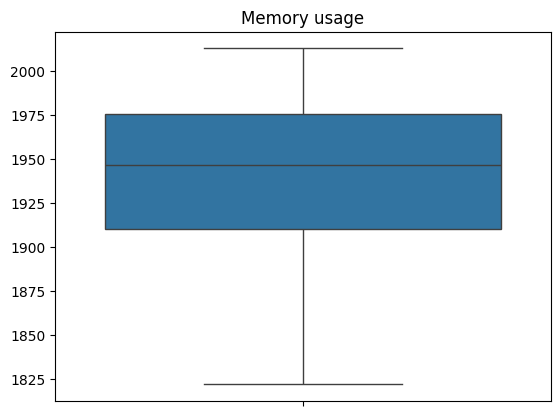

Values go from 1821.703 to 2012.949 of 1300 elements, with mean 1940.0400238461539 and std 39.31412869852638. With p-value for a normal distribution 3.120355118760975e-28


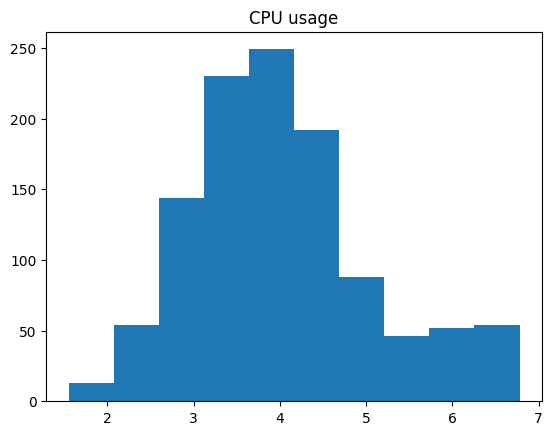

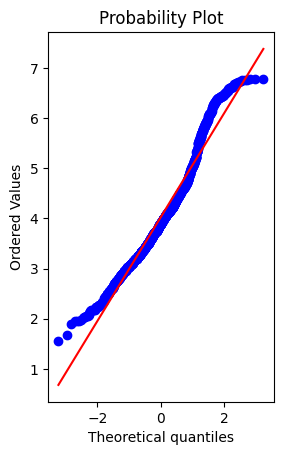

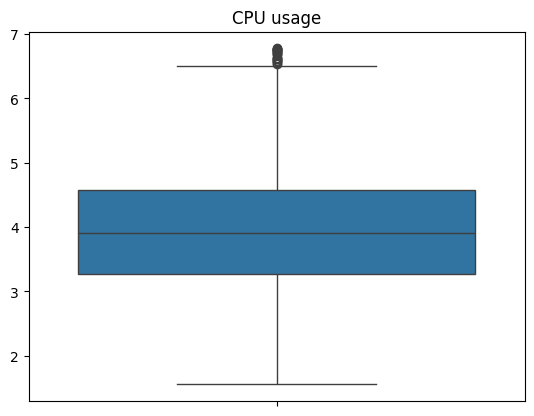

Values go from 1.552 to 6.78 of 1122 elements, with mean 4.028638146167558 and std 1.0527779814483347. With p-value for a normal distribution 7.22741083665289e-16


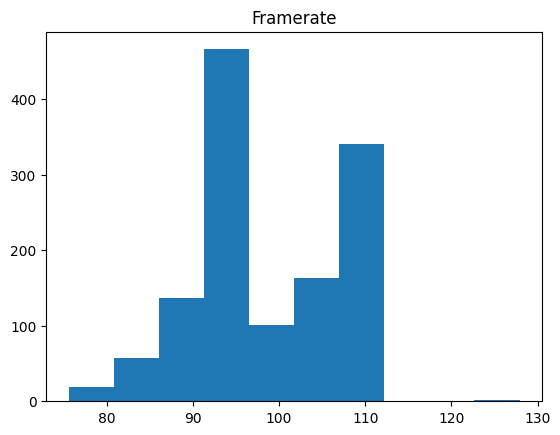

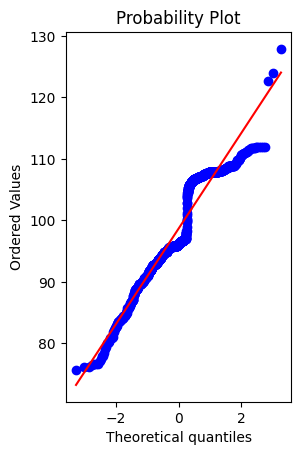

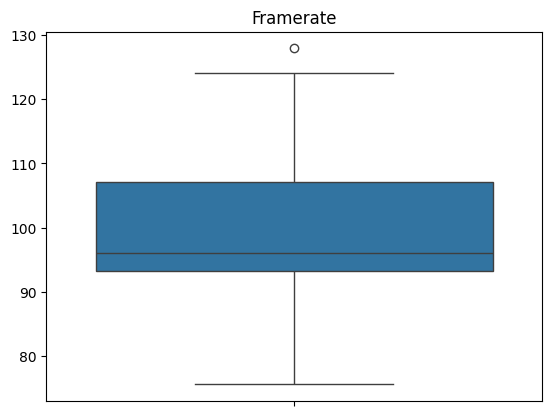

Values go from 75.6 to 127.9 of 1286 elements, with mean 98.64618973561431 and std 8.084531818929749. With p-value for a normal distribution 1.9315727236317647e-25

--------- RUNNING TREATMENT 4
Inserted field Time with the key 1
Not found limits for Time
Inserted field GPU usage with the key 3
Inserted field Memory usage with the key 7
Inserted field CPU usage with the key 53
Inserted field Framerate with the key 90


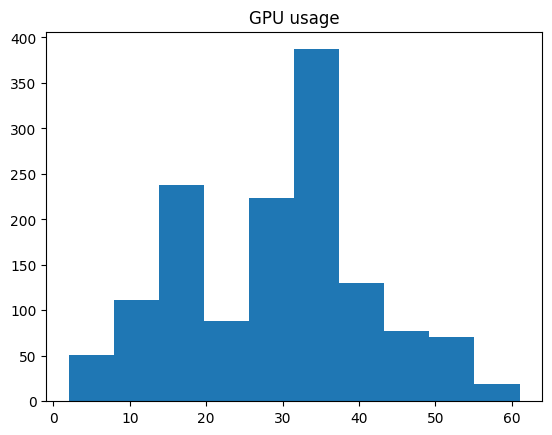

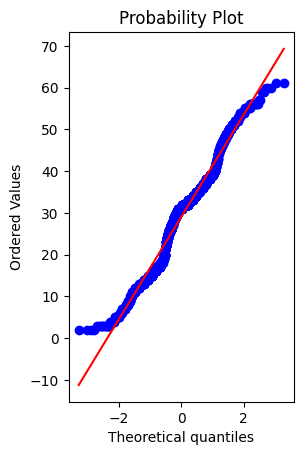

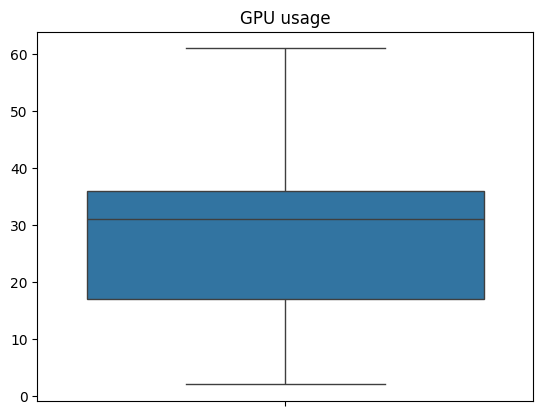

Values go from 2.0 to 61.0 of 1396 elements, with mean 29.035100286532952 and std 12.338280904925943. With p-value for a normal distribution 1.4599824811692344e-14


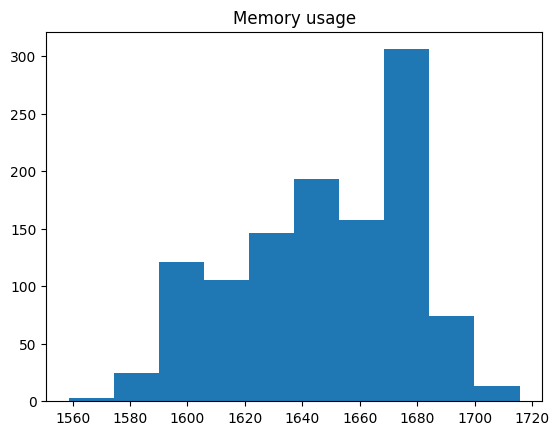

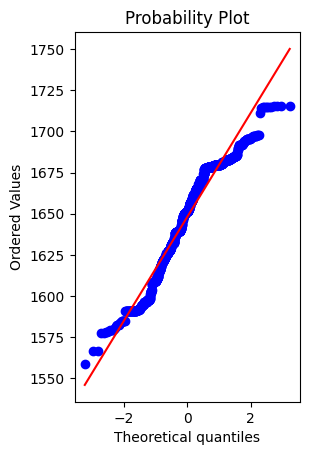

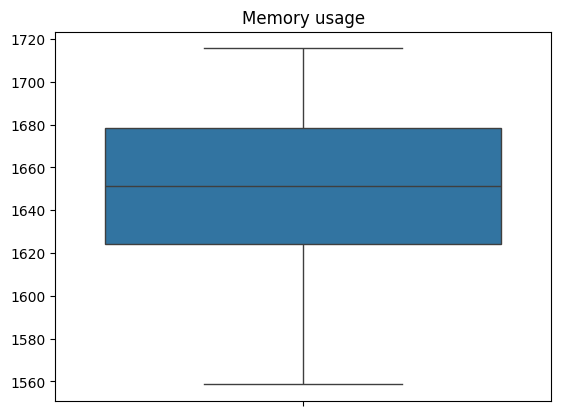

Values go from 1558.625 to 1715.621 of 1144 elements, with mean 1648.0428653846154 and std 32.21539735658643. With p-value for a normal distribution 1.88900775478595e-18


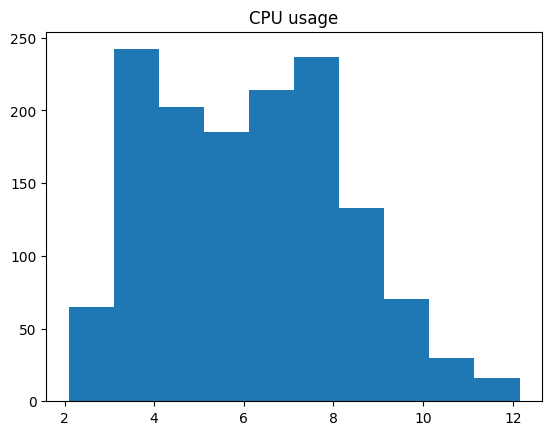

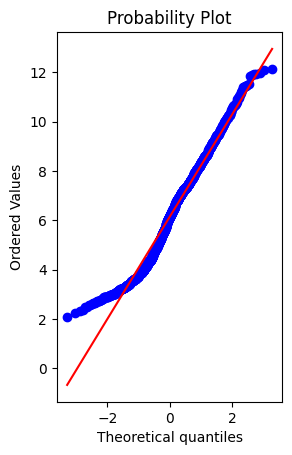

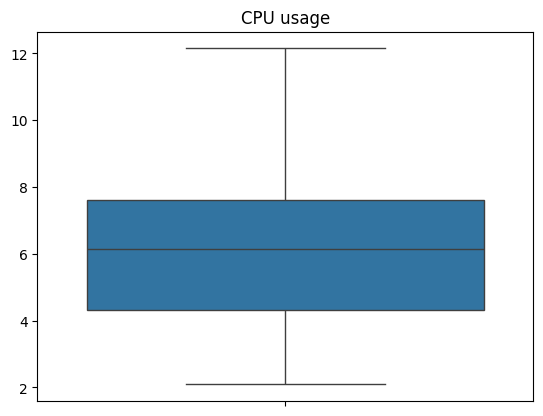

Values go from 2.092 to 12.151 of 1394 elements, with mean 6.133587517934003 and std 2.094733123443511. With p-value for a normal distribution 1.6939039362019093e-15


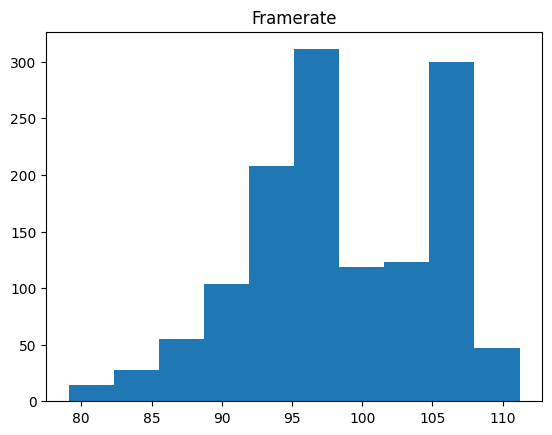

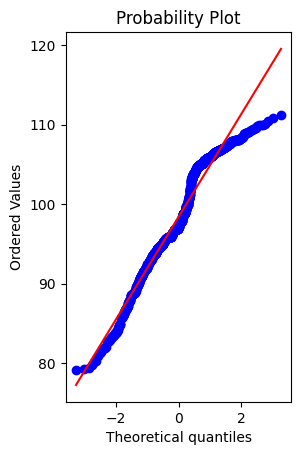

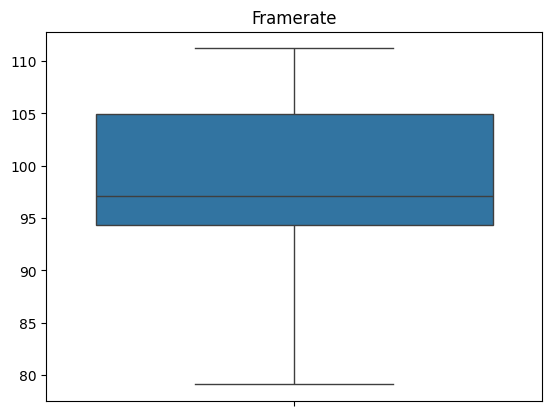

Values go from 79.1 to 111.2 of 1309 elements, with mean 98.38128342245989 and std 6.576356468943373. With p-value for a normal distribution 1.6635903474730238e-18

--------- RUNNING TREATMENT 5
Inserted field Time with the key 1
Not found limits for Time
Inserted field GPU usage with the key 3
Inserted field Memory usage with the key 7
Inserted field CPU usage with the key 53
Inserted field Framerate with the key 90


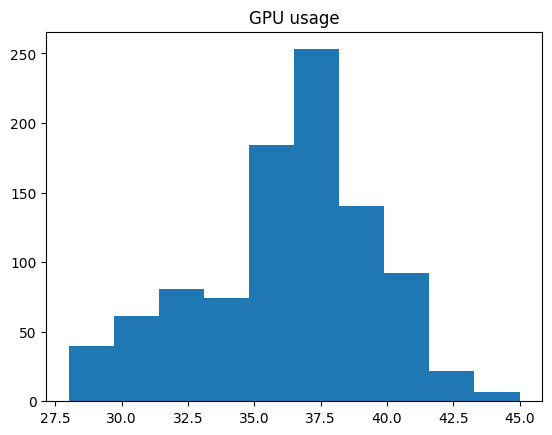

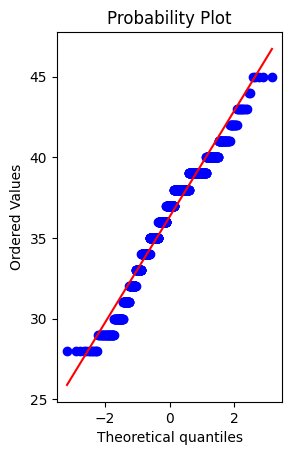

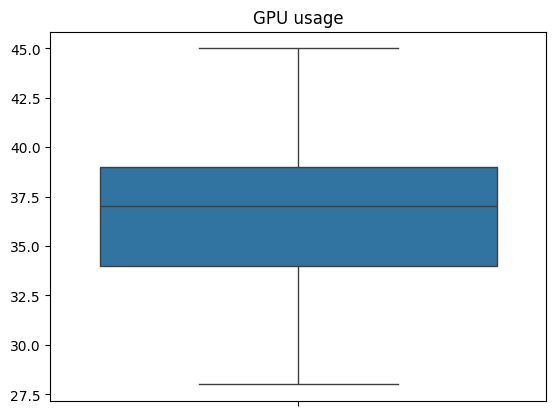

Values go from 28.0 to 45.0 of 954 elements, with mean 36.301886792452834 and std 3.3229553281813398. With p-value for a normal distribution 7.078109136116463e-15


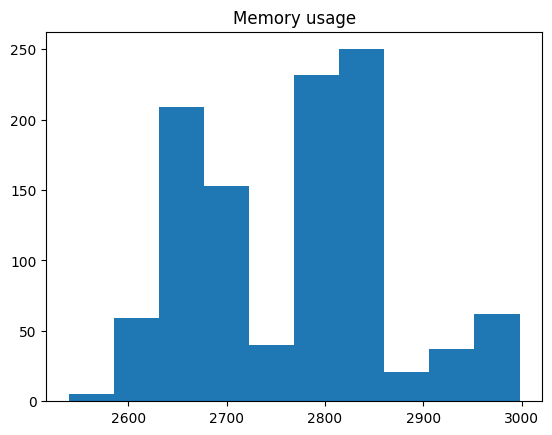

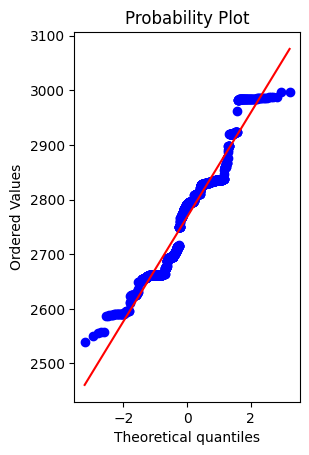

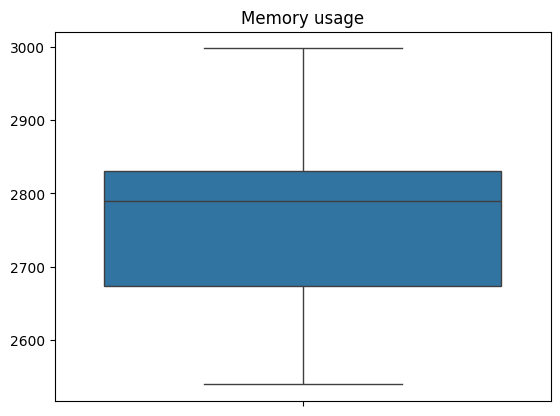

Values go from 2539.516 to 2997.668 of 1068 elements, with mean 2768.2272780898875 and std 98.00106450805858. With p-value for a normal distribution 3.658368856404219e-19


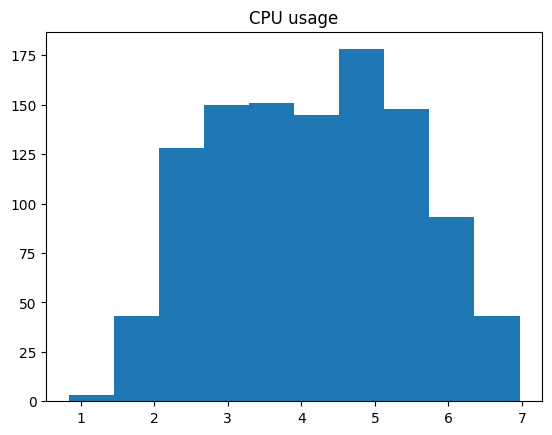

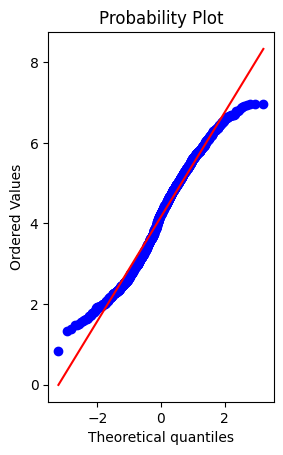

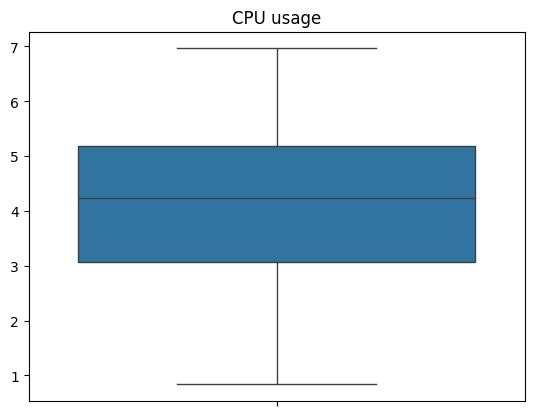

Values go from 0.837 to 6.966 of 1082 elements, with mean 4.16129112754159 and std 1.3043182117480092. With p-value for a normal distribution 3.0150380315546004e-11


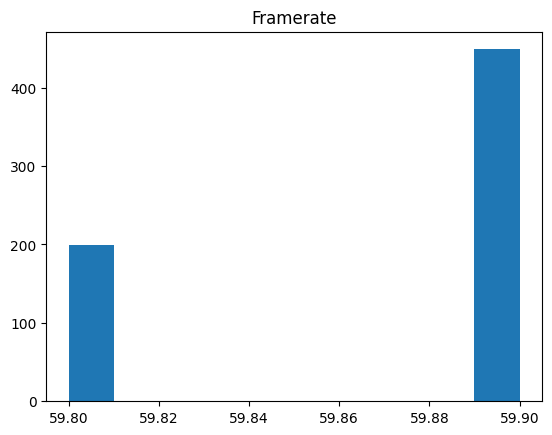

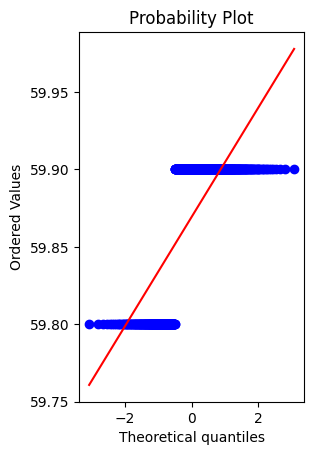

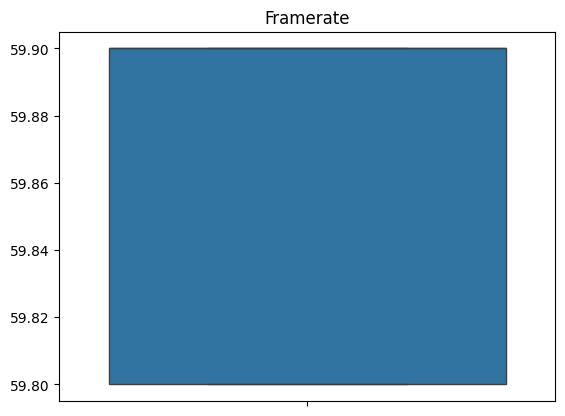

Values go from 59.8 to 59.9 of 648 elements, with mean 59.869290123456786 and std 0.04616470507908495. With p-value for a normal distribution 9.581791267055388e-37

--------- RUNNING TREATMENT 6
Inserted field Time with the key 1
Not found limits for Time
Inserted field GPU usage with the key 3
Inserted field Memory usage with the key 7
Inserted field CPU usage with the key 53
Inserted field Framerate with the key 90


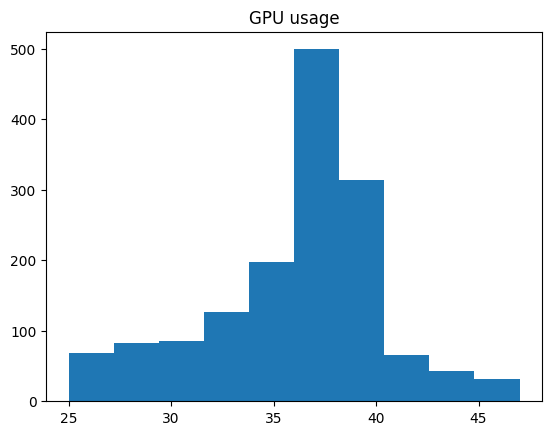

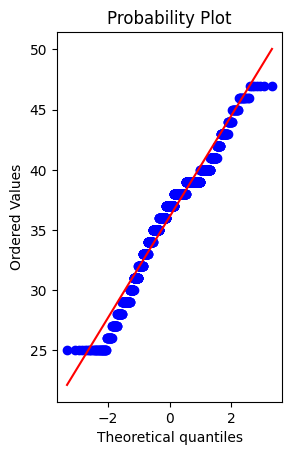

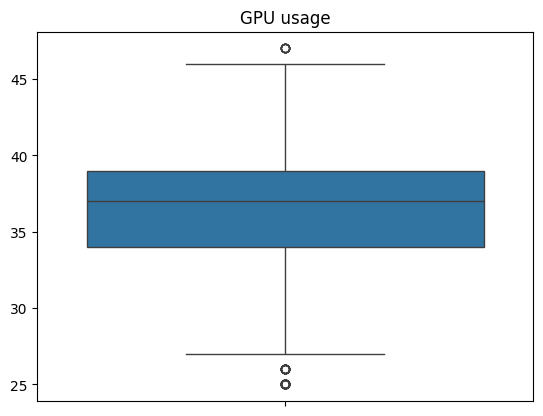

Values go from 25.0 to 47.0 of 1513 elements, with mean 36.08526107072042 and std 4.289306356790742. With p-value for a normal distribution 6.29368410719254e-20


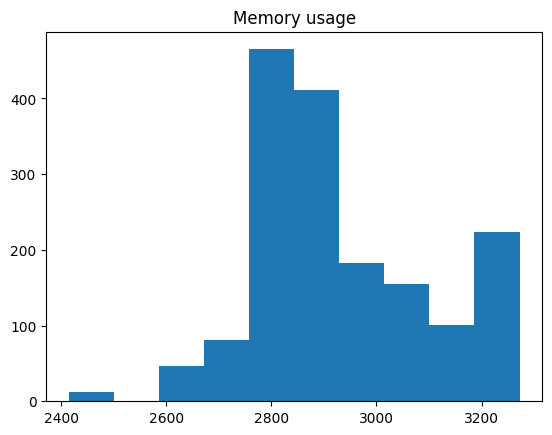

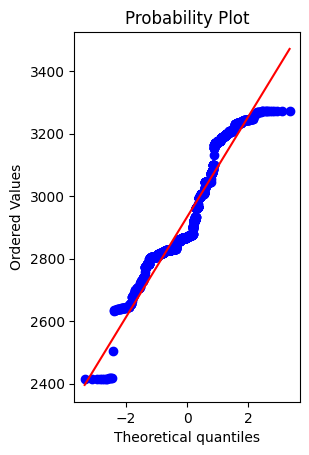

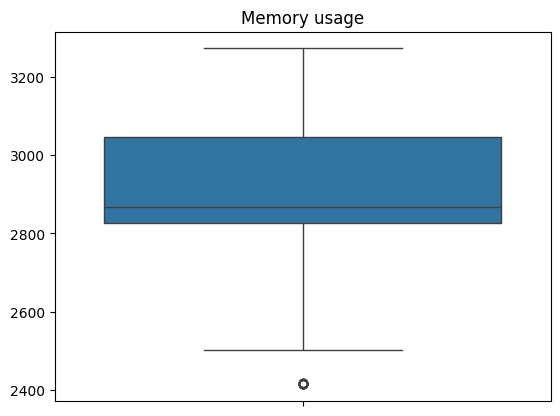

Values go from 2414.324 to 3272.191 of 1678 elements, with mean 2933.1536394517284 and std 166.84491527601747. With p-value for a normal distribution 4.6504841278455885e-28


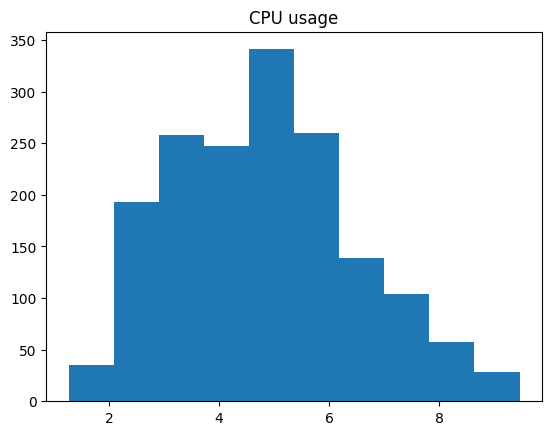

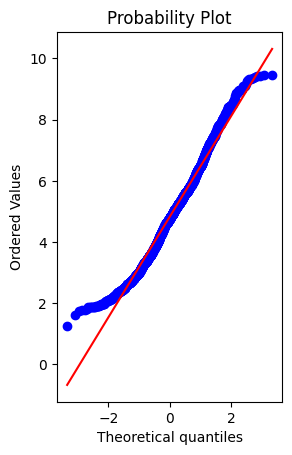

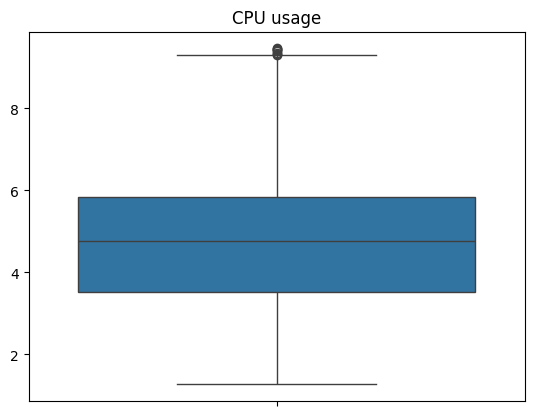

Values go from 1.265 to 9.465 of 1662 elements, with mean 4.8187418772563175 and std 1.6572300886376454. With p-value for a normal distribution 2.845918860033811e-14


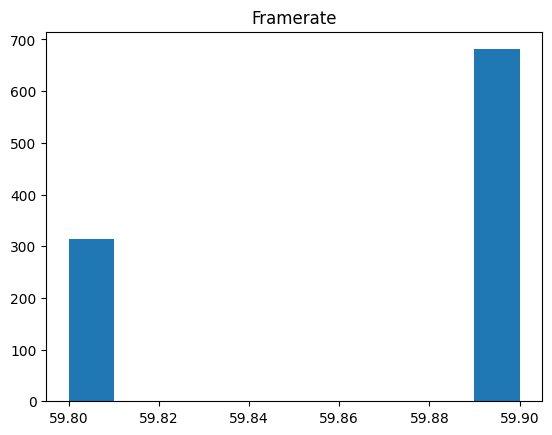

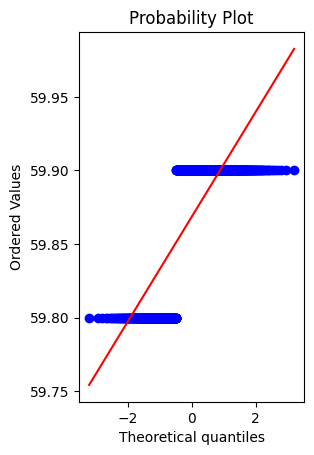

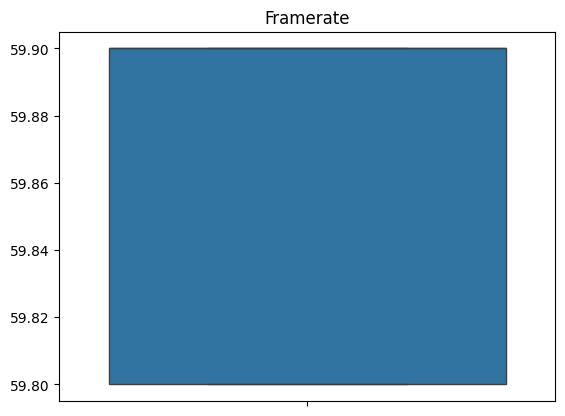

Values go from 59.8 to 59.9 of 995 elements, with mean 59.868442211055275 and std 0.04649793300544025. With p-value for a normal distribution 1.8730696792407846e-43



In [102]:
import json

def run():
    treatmentsNum = 6
    testsNum = 5

    with open("./LimitsFallout.json", 'r') as file:
        limits = json.load(file)

    project = PerformanceProject(treatmentsNum, testsNum, "./data/Fallout_Windows/", limits)
    project.run()

if __name__ == '__main__':
    run()

## References

Bethesda Support. (n.d.). What do I do if Fallout: New Vegas is crashing on my PC?. https://help.bethesda.net/#en/answer/35756

## Credits

Done by Daniel Mora Rodriguez (C25200), student of the Universidad de Costa Rica, Escuela de Ciencias de la Computacion e Informatica for the second semester of  2024.